In [59]:
from environment.TheoreticalMarket import *

tm = TheoreticalMarket(beta0 = 30, beta1 = -1.1, beta2 = -2, a = 0.1, ref_p = 1.5)
# tm = TheoreticalMarket(beta0 = 300, beta1 = -1.1, beta2 = -20, a = 0.05, ref_p = 10)

/home/larkin/code/dqn-marl/environment/TheoreticalMarket.py:35: RuntimeWarning: divide by zero encountered in double_scalars
  return (self.gamma / self.demand_func(x)) - (1 / x)
/home/larkin/code/dqn-marl/environment/TheoreticalMarket.py:39: RuntimeWarning: divide by zero encountered in double_scalars
  return self.gamma / (self.demand_func(x) * x )
/home/larkin/code/dqn-marl/environment/TheoreticalMarket.py:44: RuntimeWarning: invalid value encountered in double_scalars
  square_term = np.max([0, np.power(c1, 2) - c1 + 4*(c2 -1)*c2 - 2*c2])
/home/larkin/code/dqn-marl/.dqn-cpu-env/lib/python3.8/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


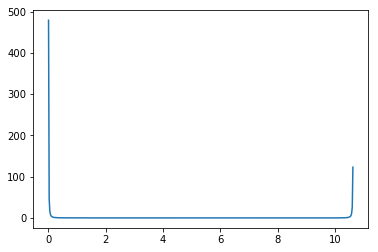

In [60]:

prices = np.linspace(0.01, 11, 500)

devs = [tm.compute_opt_dev(x) for x in prices]
demand = [tm.demand_func(x) for x in prices]


import matplotlib.pyplot as plt

plt.plot(prices, devs)

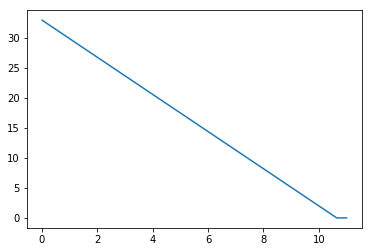

In [61]:
plt.plot(prices, np.array(demand))

In [69]:
devs

[478.9496880273937,
 46.9224055353778,
 16.54928717362242,
 8.391914289251389,
 5.069271505062745,
 3.3956312285484014,
 2.435358946247123,
 1.8334878984422156,
 1.4313124158777504,
 1.1492018469635248,
 0.9436215523025359,
 0.7891340667920957,
 0.670064963620302,
 0.5763265464281132,
 0.5011869110270982,
 0.44001350411021817,
 0.389533311752346,
 0.3473803771388068,
 0.311809814143621,
 0.2815117931353947,
 0.2554874548107218,
 0.23296425598777404,
 0.2133370459072126,
 0.19612630503653183,
 0.1809480601534836,
 0.167491886906116,
 0.1555046062622672,
 0.14477804993866006,
 0.13513977371712466,
 0.12644593356241965,
 0.11857576715827127,
 0.1114272800803959,
 0.10491384501134304,
 0.09896149950191359,
 0.09350678287478317,
 0.08849499266790582,
 0.08387877007024247,
 0.0796169452189247,
 0.07567358915781182,
 0.07201723120985531,
 0.0686202095561988,
 0.06545812970548003,
 0.06250941082685182,
 0.059754904009527744,
 0.05717756969342005,
 0.05476220400645498,
 0.05249520570591914,
 0.

In [77]:
dev_price_list = []
dev_price_arr = np.array([devs, prices])
for i in range(dev_price_arr.shape[1]):
    dev_price_list.append(dev_price_arr[:,i])

In [78]:
dev_price_list

[array([4.78949688e+02, 1.00000000e-02]),
 array([4.69224055e+01, 3.20240481e-02]),
 array([16.54928717,  0.0540481 ]),
 array([8.39191429, 0.07607214]),
 array([5.06927151, 0.09809619]),
 array([3.39563123, 0.12012024]),
 array([2.43535895, 0.14214429]),
 array([1.8334879 , 0.16416834]),
 array([1.43131242, 0.18619238]),
 array([1.14920185, 0.20821643]),
 array([0.94362155, 0.23024048]),
 array([0.78913407, 0.25226453]),
 array([0.67006496, 0.27428858]),
 array([0.57632655, 0.29631263]),
 array([0.50118691, 0.31833667]),
 array([0.4400135 , 0.34036072]),
 array([0.38953331, 0.36238477]),
 array([0.34738038, 0.38440882]),
 array([0.31180981, 0.40643287]),
 array([0.28151179, 0.42845691]),
 array([0.25548745, 0.45048096]),
 array([0.23296426, 0.47250501]),
 array([0.21333705, 0.49452906]),
 array([0.19612631, 0.51655311]),
 array([0.18094806, 0.53857715]),
 array([0.16749189, 0.5606012 ]),
 array([0.15550461, 0.58262525]),
 array([0.14477805, 0.6046493 ]),
 array([0.13513977, 0.62667335

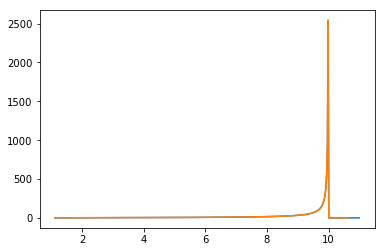

In [95]:
updated_prices = list(prices + np.array(devs))
updated_profits = [tm.compute_profit( x[1] - x[0], np.ones(3)*x[1]) for x in dev_price_list ]
profits = [tm.compute_profit(x, np.ones(3)*x ) for x in prices]

plt.plot(prices[50:], profits[50:])
plt.plot(prices[50:], updated_profits[50:])


In [96]:
np.array(updated_profits) - np.array(profits)

array([-2.74141594e+23, -4.63528161e+03, -7.82593933e+01, -1.75090036e+01,
       -7.56729407e+00, -4.27710298e+00, -2.77992397e+00, -1.96595765e+00,
       -1.47076978e+00, -1.14537212e+00, -9.19222461e-01, -7.55217034e-01,
       -6.32236611e-01, -5.37498746e-01, -4.62877241e-01, -4.02994160e-01,
       -3.54169148e-01, -3.13811159e-01, -2.80051162e-01, -2.51512213e-01,
       -2.27160996e-01, -2.06209311e-01, -1.88047140e-01, -1.72196182e-01,
       -1.58276993e-01, -1.45985335e-01, -1.35074899e-01, -1.25344505e-01,
       -1.16628490e-01, -1.08789412e-01, -1.01712455e-01, -9.53010788e-02,
       -8.94736306e-02, -8.41606591e-02, -7.93027845e-02, -7.48489892e-02,
       -7.07552388e-02, -6.69833623e-02, -6.35001362e-02, -6.02765325e-02,
       -5.72870961e-02, -5.45094286e-02, -5.19237566e-02, -4.95125701e-02,
       -4.72603171e-02, -4.51531463e-02, -4.31786878e-02, -4.13258664e-02,
       -3.95847418e-02, -3.79463713e-02, -3.64026918e-02, -3.49464175e-02,
       -3.35709513e-02, -

In [98]:
updated_profits

[-2.7414159384083553e+23,
 -4635.252588435332,
 -78.21041994312003,
 -17.440073107675204,
 -7.478405394580393,
 -4.168254843029138,
 -2.651114751384209,
 -1.8171854462694494,
 -1.3020323747203586,
 -0.9566669940302822,
 -0.7105467893461445,
 -0.5265676840210561,
 -0.3836101387721829,
 -0.2688913949593848,
 -0.17428494152008192,
 -0.09441252529007683,
 -0.025593471883033642,
 0.03476358313230732,
 0.08852799557297127,
 0.13707703214175804,
 0.1814443371046131,
 0.22241843860895677,
 0.2606096867855263,
 0.29649671480020956,
 0.33045930368731313,
 0.3628020290652886,
 0.39377153932462833,
 0.42356935836445164,
 0.45236149407645676,
 0.480285734460677,
 0.5074572478690961,
 0.5339729245223512,
 0.559914773362069,
 0.5853526026274765,
 0.6103461521219797,
 0.6349468019983783,
 0.6591989517434872,
 0.6831411403123594,
 0.7068069616090521,
 0.7302258170477397,
 0.7534235375749608,
 0.7764229004567604,
 0.7992440607378708,
 0.821904913134567,
 0.8444213969161776,
 0.8668077538334451,
 0.88907

In [99]:
profits

[0.009060943961690247,
 0.029016945112705004,
 0.04897337046771706,
 0.0689305137955987,
 0.08888867062345301,
 0.1088481382585688,
 0.1288092158106633,
 0.14877220421441753,
 0.16873740625230912,
 0.18870512657774688,
 0.20867567173851176,
 0.22864935020050992,
 0.24862647237184185,
 0.2686073506271931,
 0.28859229933255237,
 0.30858163487025997,
 0.3285756756643956,
 0.3485747422065068,
 0.36857915708168687,
 0.38858924499500636,
 0.4086053327983034,
 0.42862774951734084,
 0.4486568263793329,
 0.4686928968408506,
 0.48873629661611007,
 0.508787363705651,
 0.5288464384254113,
 0.5489138634362034,
 0.5689899837736021,
 0.5890751468782461,
 0.6091697026265648,
 0.6292740033619335,
 0.6493884039262664,
 0.6695132616920542,
 0.6896489365948535,
 0.7097957911662356,
 0.7299541905672031,
 0.7501245026220807,
 0.7703070978528896,
 0.7905023495142128,
 0.8107106336285611,
 0.8309323290222458,
 0.8511678173617688,
 0.8714174831907385,
 0.8916817139673202,
 0.9119609001022294,
 0.93225543499727

In [7]:
-(tm.beta0 - tm.beta2*tm.ref_p) / (tm.beta1 + tm.beta2)

10.64516129032258

In [8]:
tm.demand_func(8.701)

6.026899999999998

In [9]:
(tm.beta2 * tm.ref_p - tm.beta0)/ (2*(tm.beta1 + tm.beta2)) 

5.32258064516129

In [10]:
tm.demand_func(8.75)

5.875

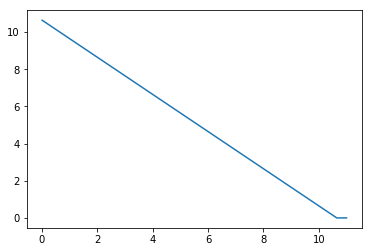

In [12]:
plt.plot(prices, np.array(demand) / tm.gamma)

In [14]:
# tm.compute_opt_dev(8.21)

tm.demand_func(5) / tm.gamma

5.64516129032258

In [19]:
devs[-40]

0.07873036042426104

In [ ]:
tm.compute_profit(0.01, np.array([0.01, 0.02, 0.02]))

0.00906396339373952

In [ ]:
tm.get_c2(0.01)

12.171659664690408

In [ ]:
tm.demand_func(0.01)

25.469